In [2]:
from ingestion import make_cleaned, make_train_test
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plan
- Distributions of SalePrice
- Boxplot of Lot Area
- Pairplot of SalePrice, Lot Area, TotalBaths, GrLivArea, GarageCars
- Boxen plots, Mean price by Neighborhood and OverallQual
- Summary statistics

In [3]:
pd.set_option('display.max.columns',99)
clean = make_cleaned()
clean

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,2,2,CBlock,2.0,Gd,BLQ,639.0,Unf,0,441,1080.0,GasA,1,Y,SBrkr,1656,0,0,1656,1.0,1,0,3,2,7,Typ,2,3.0,Attchd,1960.0,Fin,2.0,528.0,P,210,62,0,0,0,0,2.0,MnPrv,Shed,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,2.0,No,Rec,468.0,LwQ,144,270,882.0,GasA,2,Y,SBrkr,896,0,0,896,0.0,1,0,2,2,5,Typ,0,2.0,Attchd,1961.0,Unf,1.0,730.0,Y,140,0,0,0,120,0,2.0,MnPrv,Shed,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,2,2,CBlock,2.0,No,ALQ,923.0,Unf,0,406,1329.0,GasA,2,Y,SBrkr,1329,0,0,1329,0.0,1,1,3,3,6,Typ,0,1.666667,Attchd,1958.0,Unf,1.0,312.0,Y,393,36,0,0,0,0,2.0,MnPrv,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,3,2,CBlock,2.0,No,ALQ,1065.0,Unf,0,1045,2110.0,GasA,4,Y,SBrkr,2110,0,0,2110,1.0,2,1,3,4,8,Typ,2,2.0,Attchd,1968.0,Fin,2.0,522.0,Y,0,0,0,0,0,0,2.0,MnPrv,Shed,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,3.0,No,GLQ,791.0,Unf,0,137,928.0,GasA,3,Y,SBrkr,928,701,0,1629,0.0,2,1,3,2,6,Typ,1,2.0,Attchd,1997.0,Fin,2.0,482.0,Y,212,34,0,0,0,0,2.0,MnPrv,Shed,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,2.0,Av,GLQ,819.0,Unf,0,184,1003.0,GasA,2,Y,SBrkr,1003,0,0,1003,1.0,1,0,3,2,6,Typ,0,2.333333,Detchd,1984.0,Unf,2.0,588.0,Y,120,0,0,0,0,0,3.0,GdPrv,Shed,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,65.333333,8885,Pave,Grvl,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,Av,BLQ,301.0,ALQ,324,239,864.0,GasA,2,Y,SBrkr,902,0,0,902,1.0,1,0,2,2,5,Typ,0,2.333333,Attchd,1983.0,Unf,2.0,484.0,Y,164,0,0,0,0,0,3.0,MnPrv,Shed,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,2,2,PConc,3.0,Av,GLQ,337.0,Unf,0,575,912.0,GasA,2,Y,SBrkr,970,0,0,970,0.0,1,0,3,2,6,Typ,0,2.333333,Attchd,1992.666667,Unf,0.0,0.0,Y,80,32,0,0,0,0,3.0,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Grvl,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3.0,Av,

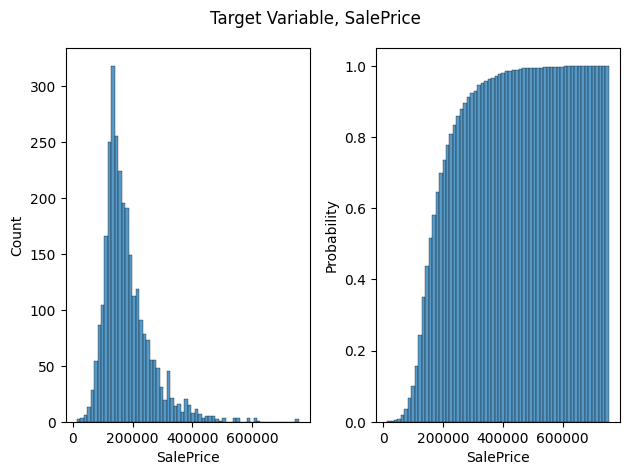

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
sns.histplot(clean.SalePrice,ax=ax1)
sns.histplot(clean.SalePrice,cumulative=True,stat='probability',ax=ax2)
plt.suptitle("Target Variable, SalePrice")
plt.tight_layout()

Text(0.5, 0, 'log10( LotArea )')

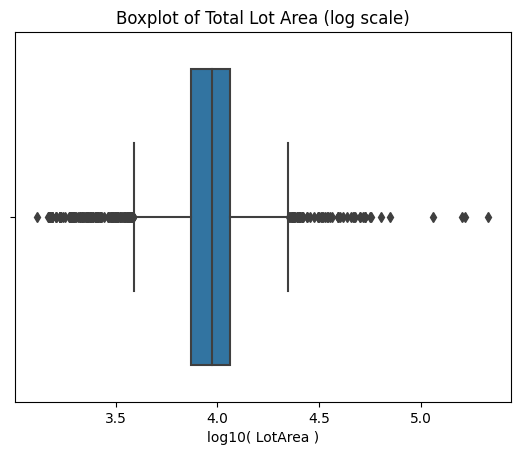

In [5]:
sns.boxplot(x=np.log10(clean.LotArea))
plt.title("Boxplot of Total Lot Area (log scale)")
plt.xlabel("log10( LotArea )")

In [6]:
# Pairplots show positive correlation with several common sense attributes

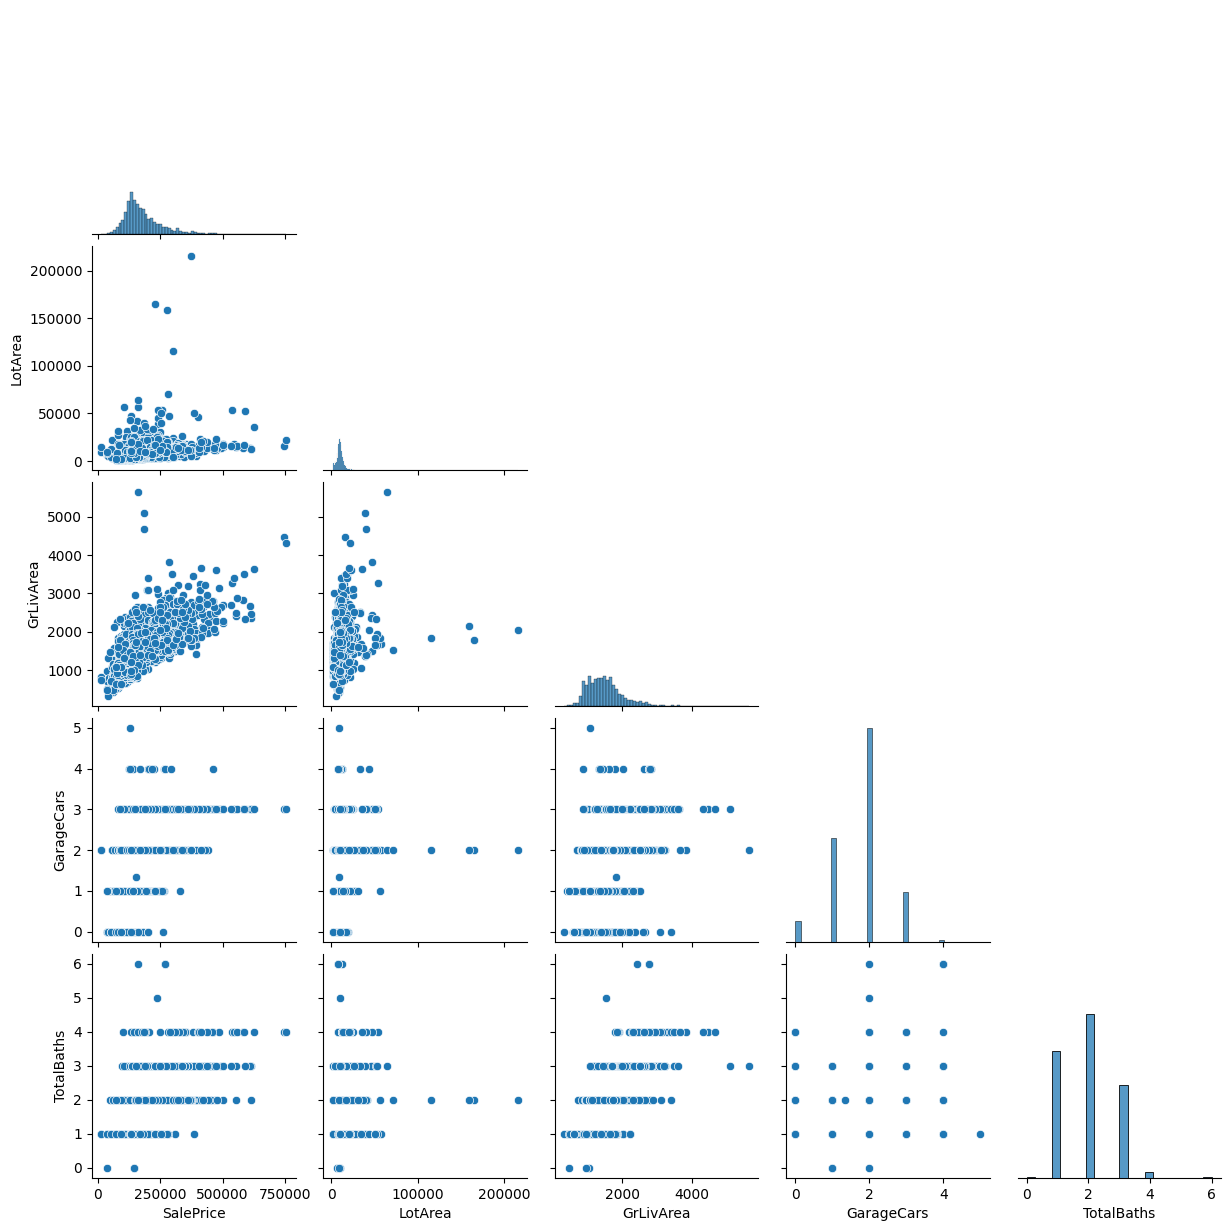

In [7]:
clean["TotalBaths"] = clean.HalfBath + clean.FullBath
sns.pairplot(data=clean[["SalePrice","LotArea", "GrLivArea","GarageCars","TotalBaths"]],corner=True)

# Mean price by OverallQual, Neighborhood

Text(0.5, 1.0, 'Sale Price By Overall Quality of Materials and Finish')

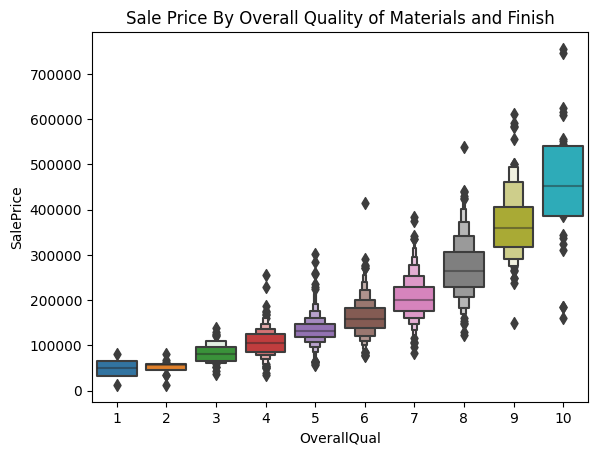

In [8]:
sns.boxenplot(x=clean.OverallQual,y=clean.SalePrice)
plt.title("Sale Price By Overall Quality of Materials and Finish")

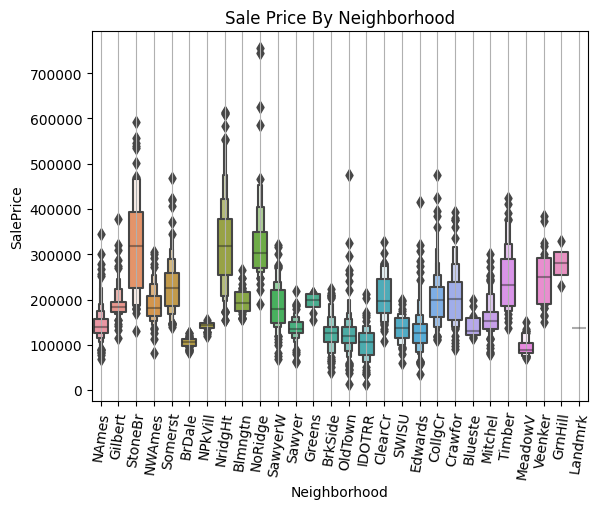

In [9]:
sns.boxenplot(x=clean.Neighborhood,y=clean.SalePrice)
plt.title("Sale Price By Neighborhood")
plt.xticks(rotation=82)
plt.grid(axis='x')

# StoneBr, NridgHt, NoRidge are most expensive areas

In [10]:
pd.options.display.float_format = '{:,.1f}'.format
clean.select_dtypes(np.number).describe()

,Order,PID,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,TotalBaths
count,"2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0","2,930.0"
mean,"1,465.5","714,464,497.0",69.6,"10,147.9",6.1,5.6,"1,971.4","1,984.3",101.9,2.4,2.1,2.6,442.5,49.7,559.1,"1,051.3",3.1,"1,159.6",335.5,4.7,"1,499.7",0.4,1.6,0.4,2.9,2.5,6.4,0.6,2.3,"1,977.0",1.8,472.8,93.8,47.5,23.0,2.6,16.0,2.2,2.8,50.6,6.2,"2,007.8","180,796.1",1.9
std,846.0,"188,730,844.6",22.5,"7,880.0",1.4,1.1,30.2,20.9,178.8,0.6,0.4,0.7,455.6,169.1,439.5,440.8,1.0,391.9,428.4,46.3,505.5,0.5,0.6,0.5,0.8,0.7,1.6,0.6,0.8,25.7,0.8,215.0,126.4,67.5,64.1,25.1,56.1,35.6,0.4,566.3,2.7,1.3,"79,886.7",0.8
min,1.0,"526,301,100.0",21.0,"1,300.0",1.0,1.0,"1,872.0","1,950.0",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,"1,895.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"2,006.0","12,789.0",0.0
25%,733.2,"528,477,022.5",59.3,"7,440.2",5.0,5.0,"1,954.0","1,965.0",0.0,2.0,2.0,2.0,0.0,0.0,219.0,793.0,2.0,876.2,0.0,0.0,"1,126.0",0.0,1.0,0.0,2.0,2.0,5.0,0.0,2.0,"1,959.0",1.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,0.0,4.0,"2,007.0","129,500.0",1.0
50%,"1,465.5","535,453,620.0",70.0,"9,436.5",6.0,5.0,"1,973.0","1,993.0",0.0,2.0,2.0,3.0,370.0,0.0,465.5,990.0,4.0,"1,084.0",0.0,0.0,"1,442.0",0.0,2.0,0.0,3.0,2.0,6.0,1.0,2.3,"1,978.0",2.0,480.0,0.0,27.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,"2,008.0","160,000.0",2.0
75%,"2,197.8","907,181,097.5",80.0,"11,555.2",7.0,6.0,"2,001.0","2,004.0",164.0,3.0,2.0,3.0,734.0,0.0,801.8,"1,301.5",4.0,"1,384.0",703.8,0.0,"1,742.8",1.0,2.0,1.0,3.0,3.0,7.0,1.0,3.0,"2,001.0",2.0,576.0,168.0,70.0,0.0,0.0,0.0,0.0,3.0,0.0,8.0,"2,009.0","213,500.0",3.0
max,"2,930.0","1,007,100,110.0",313.0,"215,245.0",10.0,9.0,"2,010.0","2,010.0","1,600.0",4.0,4.0,4.0,"5,644.0","1,526.0","2,336.0","6,110.0",4.0,"5,095.0","2,065.0","1,064.0","5,642.0",3.0,4.0,2.0,8.0,4.0,15.0,4.0,4.0,"2,207.0",5.0,"1,488.0","1,424.0",742.0,"1,012.0",508.0,576.0,800.0,4.0,"17,000.0",12.0,"2,010.0","755,000.0",6.0


# Order ID versus SalePrice

Text(0.5, 1.0, 'Correlation of Order Number and SalePrice')

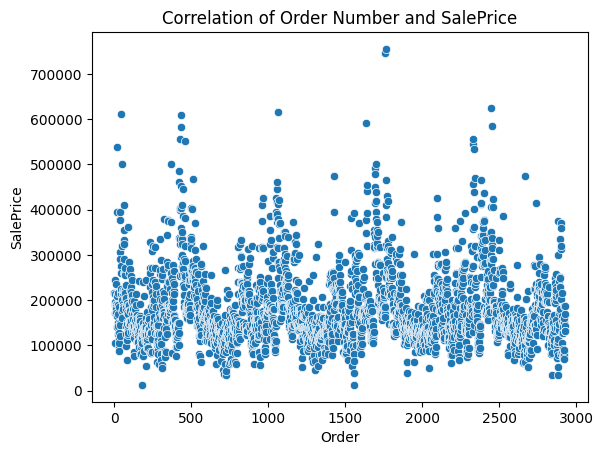

In [11]:
sns.scatterplot(x=clean.Order, y=clean.SalePrice)
plt.title("Correlation of Order Number and SalePrice")

Text(0.5, 1.0, 'Correlation of PID and SalePrice')

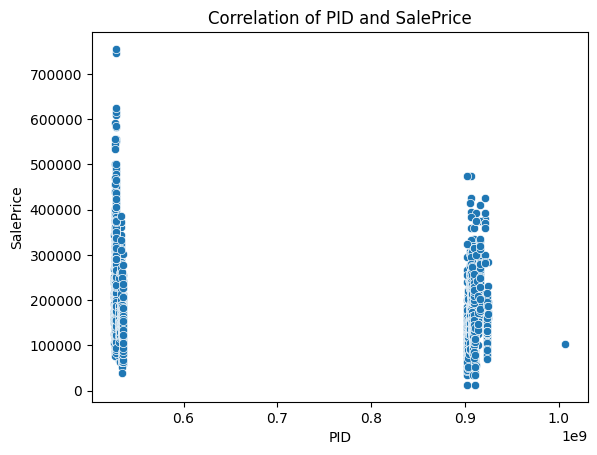

In [12]:
sns.scatterplot(x=clean.PID, y=clean.SalePrice)
plt.title("Correlation of PID and SalePrice")

# Outliers Analysis

In [13]:
# SalePrice outliers
clean[clean.SalePrice > 690000]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths
1760,1761,528320050,60,RL,160.0,15623,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,3,2,PConc,4.0,Av,GLQ,"2,096.0",Unf,0,300,"2,396.0",GasA,4,Y,SBrkr,2411,2065,0,4476,1.0,3,1,4,4,10,Typ,2,2.0,Attchd,"1,996.0",Fin,3.0,813.0,Y,171,78,0,0,0,555,4.0,MnPrv,Shed,0,7,2007,WD,Abnorml,745000,4
1767,1768,528351010,60,RL,104.0,21535,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,"1,170.0",4,2,PConc,4.0,Gd,GLQ,"1,455.0",Unf,0,989,"2,444.0",GasA,4,Y,SBrkr,2444,1872,0,4316,0.0,3,1,4,4,10,Typ,2,4.0,Attchd,"1,994.0",Fin,3.0,832.0,Y,382,50,0,0,0,0,3.0,MnPrv,Shed,0,1,2007,WD,Normal,755000,4


In [14]:
# Examine largest lots. No clear indication of bad data. 
# Only instance eligible for removal would be 956.
clean[clean.LotArea>=10**5]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths
956,957,916176125,20,RL,150.0,215245,Pave,Grvl,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,2,2,CBlock,3.0,Gd,ALQ,"1,236.0",Rec,820,80,"2,136.0",GasW,2,Y,SBrkr,2036,0,0,2036,2.0,2,0,3,2,8,Typ,2,3.0,Attchd,"1,965.0",RFn,2.0,513.0,Y,0,0,0,0,0,0,3.0,MnPrv,Shed,0,6,2009,WD,Normal,375000,2
1570,1571,916125425,190,RL,79.3,164660,Grvl,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,2.0,Gd,ALQ,"1,249.0",BLQ,147,103,"1,499.0",GasA,4,Y,SBrkr,1619,167,0,1786,2.0,2,0,3,2,7,Typ,2,3.0,Attchd,"1,965.0",Fin,2.0,529.0,Y,670,0,0,0,0,0,3.0,MnPrv,Shed,700,8,2008,WD,Normal,228950,2
2071,2072,905301050,20,RL,78.7,115149,Pave,Grvl,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,2,2,CBlock,3.0,Gd,GLQ,"1,219.0",Unf,0,424,"1,643.0",GasA,2,Y,SBrkr,1824,0,0,1824,1.0,2,0,2,3,5,Typ,2,2.0,Attchd,"1,971.0",Unf,2.0,739.0,Y,380,48,0,0,0,0,2.7,MnPrv,Shed,0,6,2007,WD,Normal,302000,2
2115,2116,906426060,50,RL,98.3,159000,Pave,Grvl,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,3,2,CBlock,3.0,Gd,Rec,697.0,Unf,0,747,"1,444.0",GasA,3,Y,SBrkr,1444,700,0,2144,0.0,2,0,4,3,7,Typ,2,2.0,Attchd,"1,958.0",Fin,2.0,389.0,Y,0,98,0,0,0,0,2.7,MnPrv,Shed,500,6,2007,WD,Normal,277000,2


In [15]:
# Years that are not self-consistent
clean[clean.GarageYrBlt > clean.YrSold]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths
2180,2181,908154195,20,RL,128.0,39290,Pave,Grvl,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,"1,224.0",4,2,PConc,4.0,Gd,GLQ,"4,010.0",Unf,0,1085,"5,095.0",GasA,4,Y,SBrkr,5095,0,0,5095,1.0,2,1,2,4,15,Typ,2,3.0,Attchd,"2,008.0",Fin,3.0,"1,154.0",Y,546,484,0,0,0,0,3.0,MnPrv,Elev,17000,10,2007,New,Partial,183850,3
2260,2261,916384070,20,RL,68.0,8298,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,38.7,3,2,PConc,3.0,Av,GLQ,583.0,Unf,0,963,"1,546.0",GasA,4,Y,SBrkr,1564,0,0,1564,0.0,2,0,2,4,6,Typ,1,3.0,Attchd,"2,207.0",RFn,2.0,502.0,Y,132,0,0,0,0,0,3.0,MnPrv,Shed,0,9,2007,New,Partial,267300,2


In [16]:
# Years that are not self-consistent
clean[clean.YearBuilt > clean.YrSold]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBaths
2180,2181,908154195,20,RL,128.0,39290,Pave,Grvl,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,"1,224.0",4,2,PConc,4.0,Gd,GLQ,"4,010.0",Unf,0,1085,"5,095.0",GasA,4,Y,SBrkr,5095,0,0,5095,1.0,2,1,2,4,15,Typ,2,3.0,Attchd,"2,008.0",Fin,3.0,"1,154.0",Y,546,484,0,0,0,0,3.0,MnPrv,Elev,17000,10,2007,New,Partial,183850,3


# Train and Test Distributions

In [17]:
X_train, X_test, y_train, y_test = make_train_test()

(0.0, 750000.0)

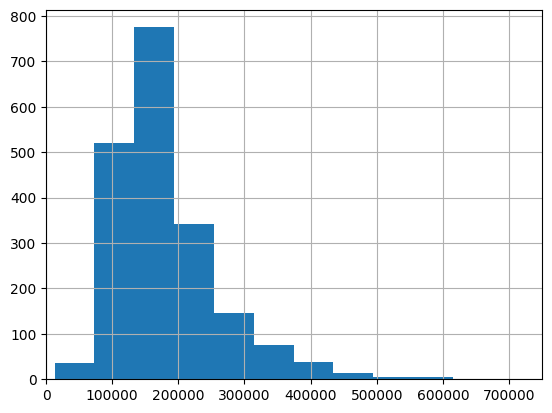

In [18]:
y_train.hist()
plt.xlim(0,7.5e5)

(0.0, 750000.0)

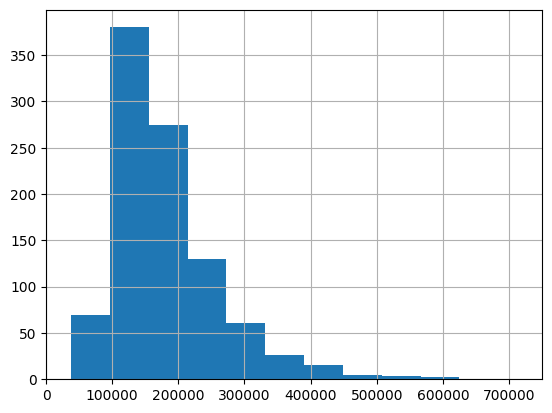

In [19]:
y_test.hist()
plt.xlim(0,7.5e5)